In [94]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter("ignore")

df = pd.read_excel("euro.xlsx", engine="openpyxl")
df.drop(columns=['nominal','cdx'],axis=1, inplace=True)
df

,data,curs
0,2022-10-11,60.8019
1,2022-10-08,59.9756
2,2022-10-07,58.2392
3,2022-10-06,58.0613
4,2022-10-05,56.1725
...,...,...
263,2021-09-16,86.0674
264,2021-09-15,85.9880
265,2021-09-14,86.1150
266,2021-09-11,86.1478


<AxesSubplot:xlabel='data'>

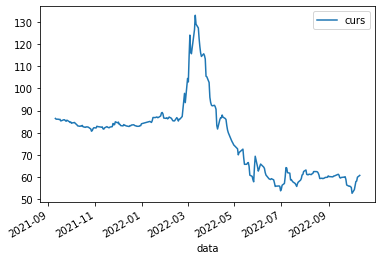

In [95]:
df = df.sort_values(by='data').reset_index(drop=True)
df.set_index('data').plot()


In [96]:
df.set_index('data', inplace = True)

In [97]:
df

,curs
data,
2021-09-10,86.4677
2021-09-11,86.1478
2021-09-14,86.1150
2021-09-15,85.9880
2021-09-16,86.0674
...,...
2022-10-05,56.1725
2022-10-06,58.0613
2022-10-07,58.2392


In [98]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['curs'].shift(lag)

    data['y_mean'] = data['curs'].shift().rolling(rolling_mean_size).mean().copy()

   

In [99]:
make_features(df,30,3)
df.dropna(inplace = True) 

In [100]:
df

,curs,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2021-10-22,82.6399,2021,10,22,4,0,82.6162,82.6841,82.4592,82.7276,...,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,86.1150,86.1478,86.4677,82.586500
2021-10-23,82.4979,2021,10,23,5,0,82.6399,82.6162,82.6841,82.4592,...,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,86.1150,86.1478,82.646733
2021-10-26,81.7418,2021,10,26,1,0,82.4979,82.6399,82.6162,82.6841,...,85.2040,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,86.1150,82.584667
2021-10-27,80.7019,2021,10,27,2,0,81.7418,82.4979,82.6399,82.6162,...,85.6823,85.2040,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,82.293200
2021-10-28,81.0289,2021,10,28,3,0,80.7019,81.7418,82.4979,82.6399,...,85.0355,85.6823,85.2040,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,81.647200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,56.1725,2022,10,5,2,0,54.3947,52.7379,55.4064,55.7232,...,60.2187,60.2842,60.2141,60.5752,59.9608,59.8784,59.5983,59.5082,59.3304,54.179667
2022-10-06,58.0613,2022,10,6,3,0,56.1725,54.3947,52.7379,55.4064,...,60.1408,60.2187,60.2842,60.2141,60.5752,59.9608,59.8784,59.5983,59.5082,54.435033
2022-10-07,58.2392,2022,10,7,4,0,58.0613,56.1725,54.3947,52.7379,...,60.4929,60.1408,60.2187,60.2842,60.2141,60.5752,59.9608,59.8784,59.5983,56.209500


In [101]:
df.dropna(inplace = True)
df

,curs,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2021-10-22,82.6399,2021,10,22,4,0,82.6162,82.6841,82.4592,82.7276,...,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,86.1150,86.1478,86.4677,82.586500
2021-10-23,82.4979,2021,10,23,5,0,82.6399,82.6162,82.6841,82.4592,...,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,86.1150,86.1478,82.646733
2021-10-26,81.7418,2021,10,26,1,0,82.4979,82.6399,82.6162,82.6841,...,85.2040,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,86.1150,82.584667
2021-10-27,80.7019,2021,10,27,2,0,81.7418,82.4979,82.6399,82.6162,...,85.6823,85.2040,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,85.9880,82.293200
2021-10-28,81.0289,2021,10,28,3,0,80.7019,81.7418,82.4979,82.6399,...,85.0355,85.6823,85.2040,85.4889,85.8568,85.8785,85.4614,85.3622,86.0674,81.647200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,56.1725,2022,10,5,2,0,54.3947,52.7379,55.4064,55.7232,...,60.2187,60.2842,60.2141,60.5752,59.9608,59.8784,59.5983,59.5082,59.3304,54.179667
2022-10-06,58.0613,2022,10,6,3,0,56.1725,54.3947,52.7379,55.4064,...,60.1408,60.2187,60.2842,60.2141,60.5752,59.9608,59.8784,59.5983,59.5082,54.435033
2022-10-07,58.2392,2022,10,7,4,0,58.0613,56.1725,54.3947,52.7379,...,60.4929,60.1408,60.2187,60.2842,60.2141,60.5752,59.9608,59.8784,59.5983,56.209500


In [102]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('curs',axis=1),
                                                  df.curs,
                                                  shuffle = False,
                                                  test_size = 0.21)

In [103]:
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
print('Ошибка на Train',round(mean_absolute_error(y_train, lr.predict(X_train)),2))

Ошибка на Train 1.29


In [106]:
print('Ошибка на Test',round(mean_absolute_error(y_test, lr.predict(X_test)),2))

Ошибка на Test 0.87


In [107]:
# Предсказываем на 12.10.2022

df_n = pd.DataFrame(df['curs']).reset_index().copy()

In [110]:
df_n

,data,curs
0,2021-10-22,82.6399
1,2021-10-23,82.4979
2,2021-10-26,81.7418
3,2021-10-27,80.7019
4,2021-10-28,81.0289
...,...,...
233,2022-10-05,56.1725
234,2022-10-06,58.0613
235,2022-10-07,58.2392
236,2022-10-08,59.9756


In [111]:
df_concat = df_n.tail(1).copy()

In [112]:
df_concat.reset_index( inplace = True , drop=True)

In [113]:
df_concat

,data,curs
0,2022-10-11,60.8019


In [114]:
df_concat['data'] = pd.to_datetime('2022-10-12')

In [115]:
df_concat['curs'] = 0
df_concat

,data,curs
0,2022-10-12,0


In [116]:
df_1 = pd.concat([df_n,df_concat], ignore_index=True)

In [117]:
df_1.set_index('data', inplace = True)

In [118]:
df_1.tail()

,curs
data,
2022-10-06,58.0613
2022-10-07,58.2392
2022-10-08,59.9756
2022-10-11,60.8019
2022-10-12,0.0000


In [119]:
make_features(df_1,30,3)

In [120]:
df_1.drop('curs',axis=1).tail(1)

,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2022-10-12,2022,10,12,2,0,60.8019,59.9756,58.2392,58.0613,56.1725,...,60.8571,60.6952,60.5458,60.4929,60.1408,60.2187,60.2842,60.2141,60.5752,59.672233


In [121]:
lr_full = LinearRegression()

In [122]:
lr_full.fit(df.drop('curs',axis=1),df.curs)

LinearRegression()

In [123]:
print('Предсказание на 12 октября - ',lr.predict(df_1.drop('curs',axis=1).tail(1))[0])

Предсказание на 12 октября -  60.64842340425548


In [124]:
print('Предсказание на 12 октября, модель видела весь датасет - ',lr_full.predict(df_1.drop('curs',axis=1).tail(1))[0])

Предсказание на 12 октября, модель видела весь датасет -  60.867375426732906


In [125]:
gb = GradientBoostingRegressor()

In [126]:
gb.fit(df.drop('curs',axis=1),df.curs)

GradientBoostingRegressor()

In [127]:
gb.predict(df_1.drop('curs',axis=1).tail(1))[0]

61.00621510362995

In [ ]:
#Курс евро на 12 октября от ЦБ РФ - 62,3481 рубля